# Obj Recognizer

In [ ]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/CapstonProject02

/content/drive/MyDrive/MasterCourse/CapstonProject02


In [67]:
#!export
model = load_learner('models/obj-recognizer-v2.pkl')

In [68]:
#!export
obj_labels = (
    "Cars",
    "Trucks",
    "Traffic signals",
    "Road markings",
    "Construction zones",
    "Animals",
    "Road obstacles",
    "Pedestrians",
    "Emergency vehicles",
    "Bicycles",
    "Motorcycles",
    "Buses",
    "Road works",
    "Drones",
    "Zebra crossing"
)

# def recognize_image(image):
#   pred, idx, probs = model.predict(image)
#   print(pred)
#   return dict(zip(obj_labels, map(float, probs)))
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return pred

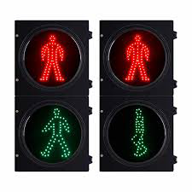

In [36]:
img = PILImage.create(f'TestImages/TrafficSignals.jpg')
img.thumbnail((192,192))
img

In [ ]:
model.predict(f'TestImages/TrafficSignals.jpg')

('Traffic signals',
 TensorBase(12),
 TensorBase([2.1576e-10, 4.5940e-07, 2.2405e-10, 4.9791e-09, 1.5431e-09,
             4.3348e-11, 1.9911e-10, 6.2653e-09, 5.4447e-08, 2.0924e-08,
             1.6037e-12, 1.7314e-09, 1.0000e+00, 3.4510e-11, 4.1379e-06]))

In [ ]:
recognize_image(img)

{'Cars': 1.9286359176362566e-09,
 'Trucks': 1.1595500559735683e-08,
 'Traffic signals': 1.4601314601847548e-10,
 'Road markings': 2.0533981182069283e-09,
 'Construction zones': 2.4159273540047543e-11,
 'Animals': 9.91637761488251e-13,
 'Road obstacles': 1.0355211133017406e-09,
 'Pedestrians': 1.4424256455924933e-08,
 'Emergency vehicles': 2.6785484941171944e-10,
 'Bicycles': 1.3870997406240093e-10,
 'Motorcycles': 3.5870855981737226e-13,
 'Buses': 2.738833049242828e-10,
 'Road works': 0.9999953508377075,
 'Drones': 5.892669165119546e-12,
 'Zebra crossing': 4.591155175148742e-06}

In [69]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'TestImages/Ped.png',
    'TestImages/RoadWorks.jpg',
    'TestImages/TrafficSignals.jpg',
    'TestImages/test.jpg',
    'TestImages/trucks.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3893ac23-4eb7-4174.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
